The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

**Agenda**

1.Importing the Libraries
2.Data Visualization
3.Feature Selection
4.Loading the Data
5.One Hot Encoding
6.Implementing ML Algorithms





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Flight_Booking.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


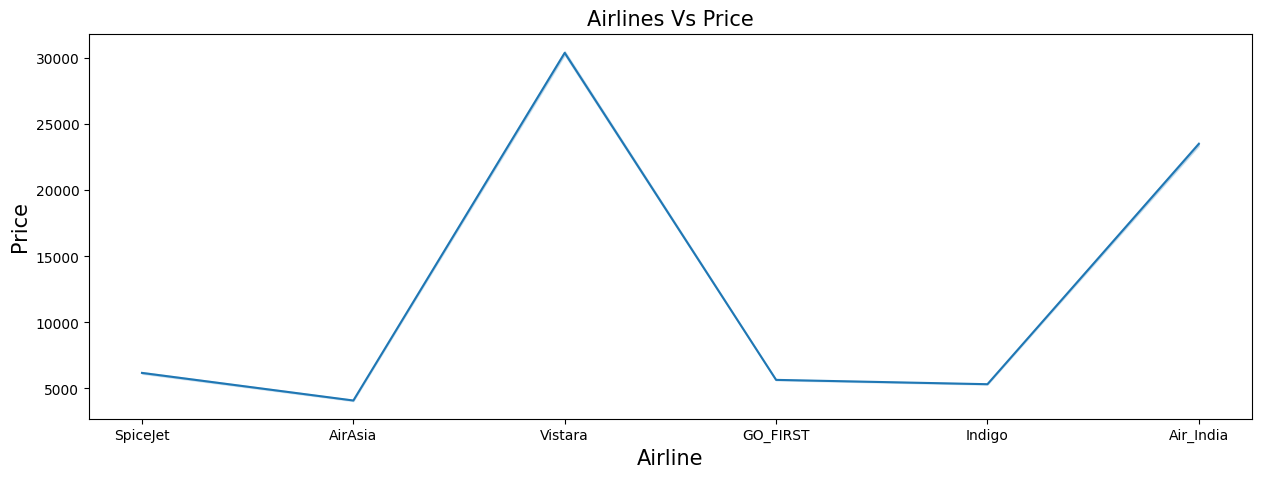

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

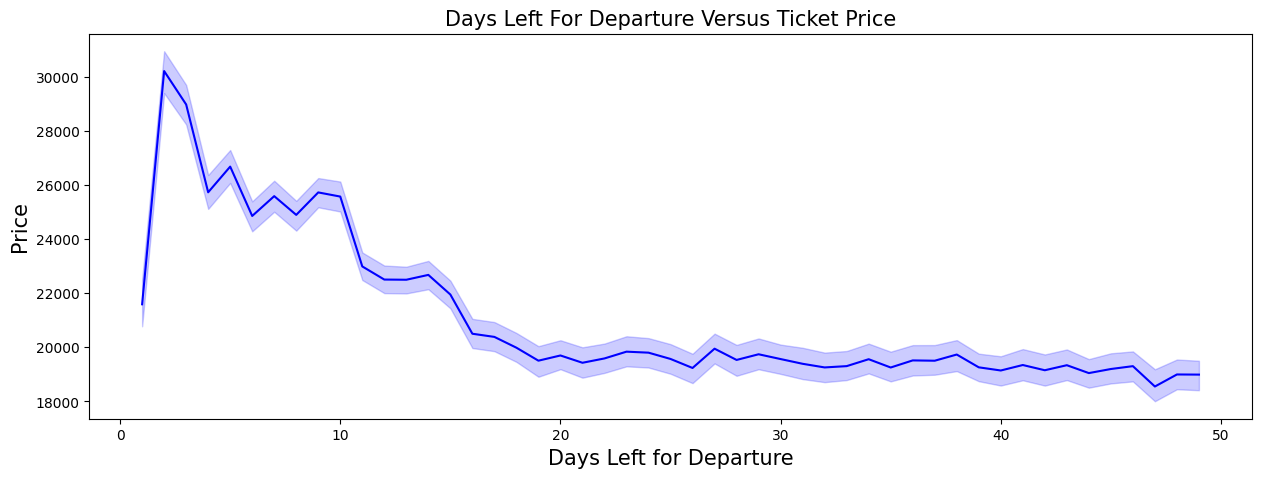

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

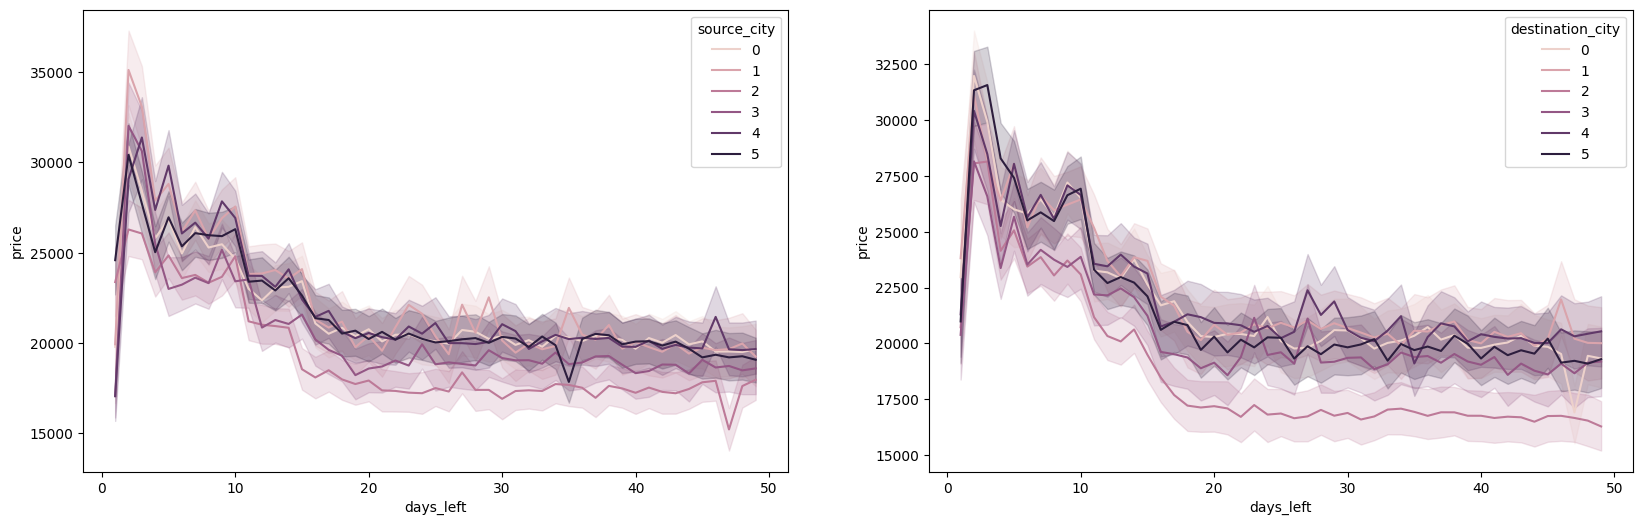

In [17]:
fig,ax=plt.subplots (1,2,figsize=(20,6))
sns.lineplot(x='days_left', y='price',data=df,hue='source_city',ax=ax[0])
sns. lineplot(x='days_left', y='price',data=df,hue='destination_city',ax=ax[1])
plt. show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["airline"] = le.fit_transform(df["airline"])
df["source_city"] = le.fit_transform(df["source_city"])
df["departure_time"] = le.fit_transform(df["departure_time"])
df["stops"] = le.fit_transform(df["stops"])
df["arrival_time"] = le.fit_transform(df["arrival_time"])
df["destination_city"] = le.fit_transform(df["destination_city"])
df["class"] = le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


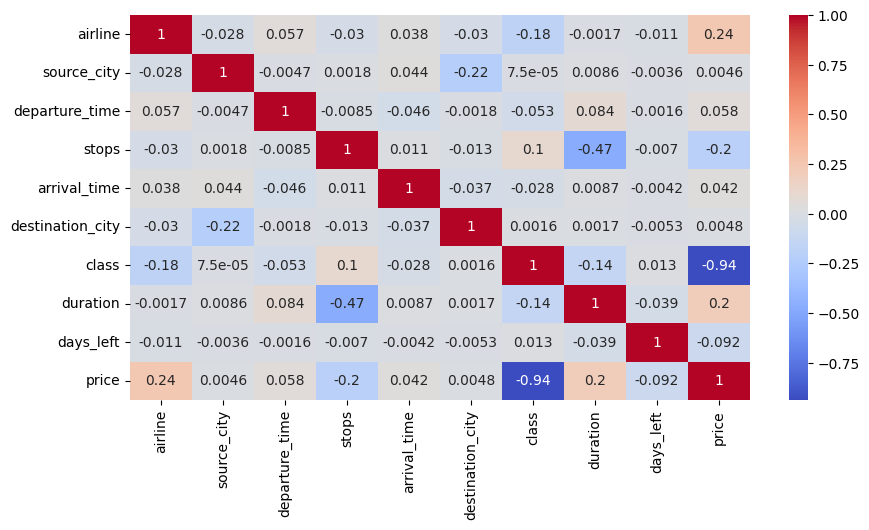

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(columns=['flight']).corr(), annot=True,cmap="coolwarm") # Drop the 'flight' column before calculating correlation.
plt.show()

In [12]:
#VIF column and VIF_data
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [22]:
df.drop(columns=["flight"])

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np

# Prepare the data
X = df.drop(columns=["price", "flight"])  # Drop "flight" and "price"
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Compare actual vs. predicted values
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
print(difference)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mean_abs_error)
print("Mean Absolute Percentage Error (MAPE):", mean_abs_percentage_error)
print("Mean Squared Error (MSE):", mean_sq_error)
print("Root Mean Squared Error (RMSE):", root_mean_sq_error)

       Actual_Value  Predicted_Value
0            7366.0      4585.880510
1           64831.0     52842.077073
2            6195.0      7877.980184
3           60160.0     56120.138579
4            6578.0      6663.204177
...             ...              ...
60026        5026.0      5829.230618
60027        3001.0       539.222230
60028        6734.0      5848.965500
60029        5082.0     -1498.061918
60030       66465.0     58762.406345

[60031 rows x 2 columns]
R-squared (R²): 0.904554350718816
Mean Absolute Error (MAE): 4624.994868016881
Mean Absolute Percentage Error (MAPE): 0.4353581089683269
Mean Squared Error (MSE): 49200540.293722
Root Mean Squared Error (RMSE): 7014.309680483319


<ipython-input-26-86625fd9d96b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = 'Actual Value')
<ipython-input-26-86625fd9d96b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label = 'Predicted Value')


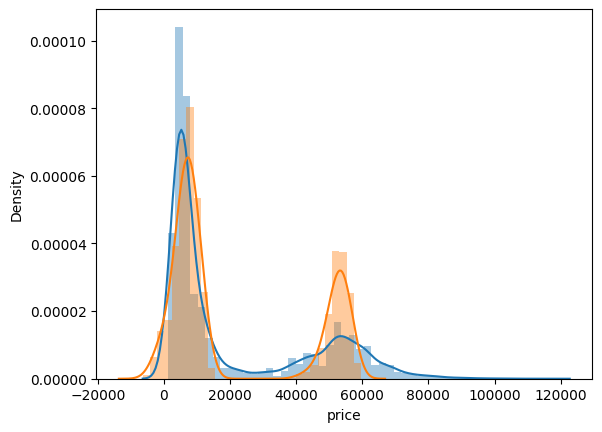

In [26]:
sns.distplot(y_test,label = 'Actual Value')
sns.distplot(y_pred,label = 'Predicted Value')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

r2 = r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mean_abs_error)
print("Mean Absolute Percentage Error (MAPE):", mean_abs_percentage_error)
print("Mean Squared Error (MSE):", mean_sq_error)
print("Root Mean Squared Error (RMSE):", root_mean_sq_error)

R-squared (R²): 0.9754394481864426
Mean Absolute Error (MAE): 1177.6675939653403
Mean Absolute Percentage Error (MAPE): 0.07412618649200925
Mean Squared Error (MSE): 12660529.08895867
Root Mean Squared Error (RMSE): 3558.163724304809


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

r2 = r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mean_abs_error)
print("Mean Absolute Percentage Error (MAPE):", mean_abs_percentage_error)
print("Mean Squared Error (MSE):", mean_sq_error)
print("Root Mean Squared Error (RMSE):", root_mean_sq_error)


R-squared (R²): 0.9849968580373921
Mean Absolute Error (MAE): 1087.7943254659035
Mean Absolute Percentage Error (MAPE): 0.07022783913515261
Mean Squared Error (MSE): 7733853.729561647
Root Mean Squared Error (RMSE): 2780.9807136263366
